 jt -t monokai -T

In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load


/home/amit/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_set = dataset_train.iloc[:, 1:2].values; training_set.shape

(1258, 1)

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)); sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
training_set_scaled = sc.fit_transform(training_set);training_set_scaled.shape

(1258, 1)

In [7]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [15]:
y_train.shape


(1198,)

In [9]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [16]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
#X_train

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
#erroe

In [20]:
# Initialising the RNN
regressor = Sequential()

In [21]:
regressor

In [22]:
X_train[1].head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
#error

In [19]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [20]:
# Fitting the RNN to the Training set6
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0455
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0045
Epoch 8/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0042
Epoch 12/100
1198/1198

In [24]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [25]:
inputs = inputs.reshape(-1,1); inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [26]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

array([[-0.05245243],
       [-0.0525257 ],
       [-0.0525733 ],
       [-0.0526003 ],
       [-0.05261584],
       [-0.05263316],
       [-0.05266353],
       [-0.05271218],
       [-0.05278046],
       [-0.0528668 ],
       [-0.05296736],
       [-0.05307676],
       [-0.05318923],
       [-0.05330058],
       [-0.05340791],
       [-0.0535156 ],
       [-0.05363176],
       [-0.05376572],
       [-0.05392129],
       [-0.05408895]], dtype=float32)

In [23]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

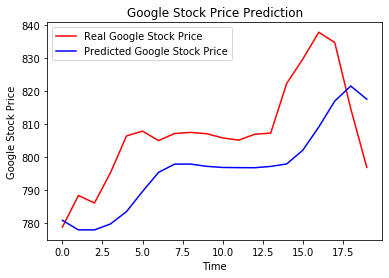

In [24]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [25]:
#!pip3 install ann_visualizer

In [26]:
#!pip3 install graphviz

In [27]:
#!conda install -c conda-forge ann_visualizer

from ann_visualizer.visualize import ann_viz
ann_viz(regressor, title="My first neural network")

import dill
dill.dump_session('notebook_env.db')

In [4]:
filename = 'model.sav'

In [5]:
dump(regressor,filename)

NameError: name 'regressor' is not defined

In [28]:
# load the model from disk
loaded_model = load(filename)

In [29]:
print(loaded_model)

In [30]:
predicted_stock_price_loaded = loaded_model.predict(X_test)
predicted_stock_price_loaded

array([[0.93331665],
       [0.92795104],
       [0.92792684],
       [0.9312863 ],
       [0.9382524 ],
       [0.9495727 ],
       [0.9603384 ],
       [0.9649893 ],
       [0.9650257 ],
       [0.9637584 ],
       [0.9631223 ],
       [0.9630211 ],
       [0.9629665 ],
       [0.963706  ],
       [0.96509194],
       [0.97277284],
       [0.9858447 ],
       [1.0005289 ],
       [1.008982  ],
       [1.0015874 ]], dtype=float32)

In [31]:
predicted_stock_price_loaded = sc.inverse_transform(predicted_stock_price_loaded)
predicted_stock_price_loaded

array([[780.8337 ],
       [777.94934],
       [777.93634],
       [779.74225],
       [783.48694],
       [789.57227],
       [795.3595 ],
       [797.8596 ],
       [797.8792 ],
       [797.198  ],
       [796.856  ],
       [796.80164],
       [796.7723 ],
       [797.1698 ],
       [797.9148 ],
       [802.04376],
       [809.0707 ],
       [816.9643 ],
       [821.5083 ],
       [817.53326]], dtype=float32)

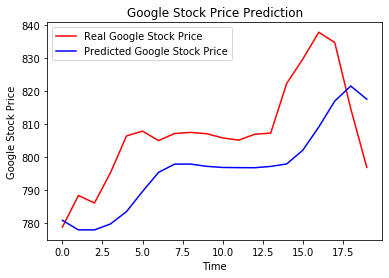

In [32]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_loaded, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()